Import Libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

Read Data

In [2]:
my_data = pd.read_csv("1991_stats2.csv", delimiter=",")
my_data[0:5]

Pos    MP    FG   FGA    FG%   3P  3PA    3P%    2P   2PA  ...  ORB  DRB  \
0  SF  40.4   9.5  17.7  0.536  0.5  1.6  0.301   9.0  16.0  ...  1.7  3.7   
1  PF  40.3  10.3  19.6  0.527  0.0  0.2  0.286  10.3  19.4  ...  2.9  8.9   
2  SG  39.3   9.1  18.5  0.494  0.5  1.5  0.348   8.6  17.0  ...  1.9  4.0   
3  PG  39.2   9.0  18.9  0.476  1.2  3.1  0.385   7.8  15.8  ...  1.1  3.0   
4  SF  39.0   7.2  16.0  0.448  0.0  0.1  0.200   7.1  15.9  ...  2.3  4.9   

    TRB  AST  STL  BLK  TOV   PF   PTS  isAllNBA  
0   5.4  4.0  2.1  0.8  3.0  2.1  25.7         1  
1  11.8  3.3  1.1  1.0  3.0  3.3  29.0         1  
2   5.9  3.1  1.6  0.4  3.0  2.7  23.9         0  
3   4.0  9.7  2.6  0.1  3.3  2.8  22.9         0  
4   7.2  4.2  2.0  0.6  2.5  3.1  18.0         0  

[5 rows x 25 columns]

Pre-processing

In [3]:
X = my_data[['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].values
X[0:5]

array([[40.4  ,  9.5  , 17.7  ,  0.536,  0.5  ,  1.6  ,  0.301,  9.   ,
        16.   ,  0.56 ,  0.55 ,  6.3  ,  7.1  ,  0.884,  1.7  ,  3.7  ,
         5.4  ,  4.   ,  2.1  ,  0.8  ,  3.   ,  2.1  , 25.7  ],
       [40.3  , 10.3  , 19.6  ,  0.527,  0.   ,  0.2  ,  0.286, 10.3  ,
        19.4  ,  0.529,  0.528,  8.3  , 10.8  ,  0.77 ,  2.9  ,  8.9  ,
        11.8  ,  3.3  ,  1.1  ,  1.   ,  3.   ,  3.3  , 29.   ],
       [39.3  ,  9.1  , 18.5  ,  0.494,  0.5  ,  1.5  ,  0.348,  8.6  ,
        17.   ,  0.506,  0.508,  5.1  ,  6.   ,  0.847,  1.9  ,  4.   ,
         5.9  ,  3.1  ,  1.6  ,  0.4  ,  3.   ,  2.7  , 23.9  ],
       [39.2  ,  9.   , 18.9  ,  0.476,  1.2  ,  3.1  ,  0.385,  7.8  ,
        15.8  ,  0.494,  0.508,  3.7  ,  4.6  ,  0.803,  1.1  ,  3.   ,
         4.   ,  9.7  ,  2.6  ,  0.1  ,  3.3  ,  2.8  , 22.9  ],
       [39.   ,  7.2  , 16.   ,  0.448,  0.   ,  0.1  ,  0.2  ,  7.1  ,
        15.9  ,  0.45 ,  0.449,  3.6  ,  4.5  ,  0.798,  2.3  ,  4.9  ,
         7.2  ,  4.2

In [4]:
y = my_data["Pos"]
y[0:5]

0    SF
1    PF
2    SG
3    PG
4    SF
Name: Pos, dtype: object

Setting up the Decision Tree

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

Modeling

In [7]:
posTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
posTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [8]:
posTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Prediction

In [9]:
predTree = posTree.predict(X_testset)

Evaluation

In [10]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.4666666666666667


Visualization

In [11]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

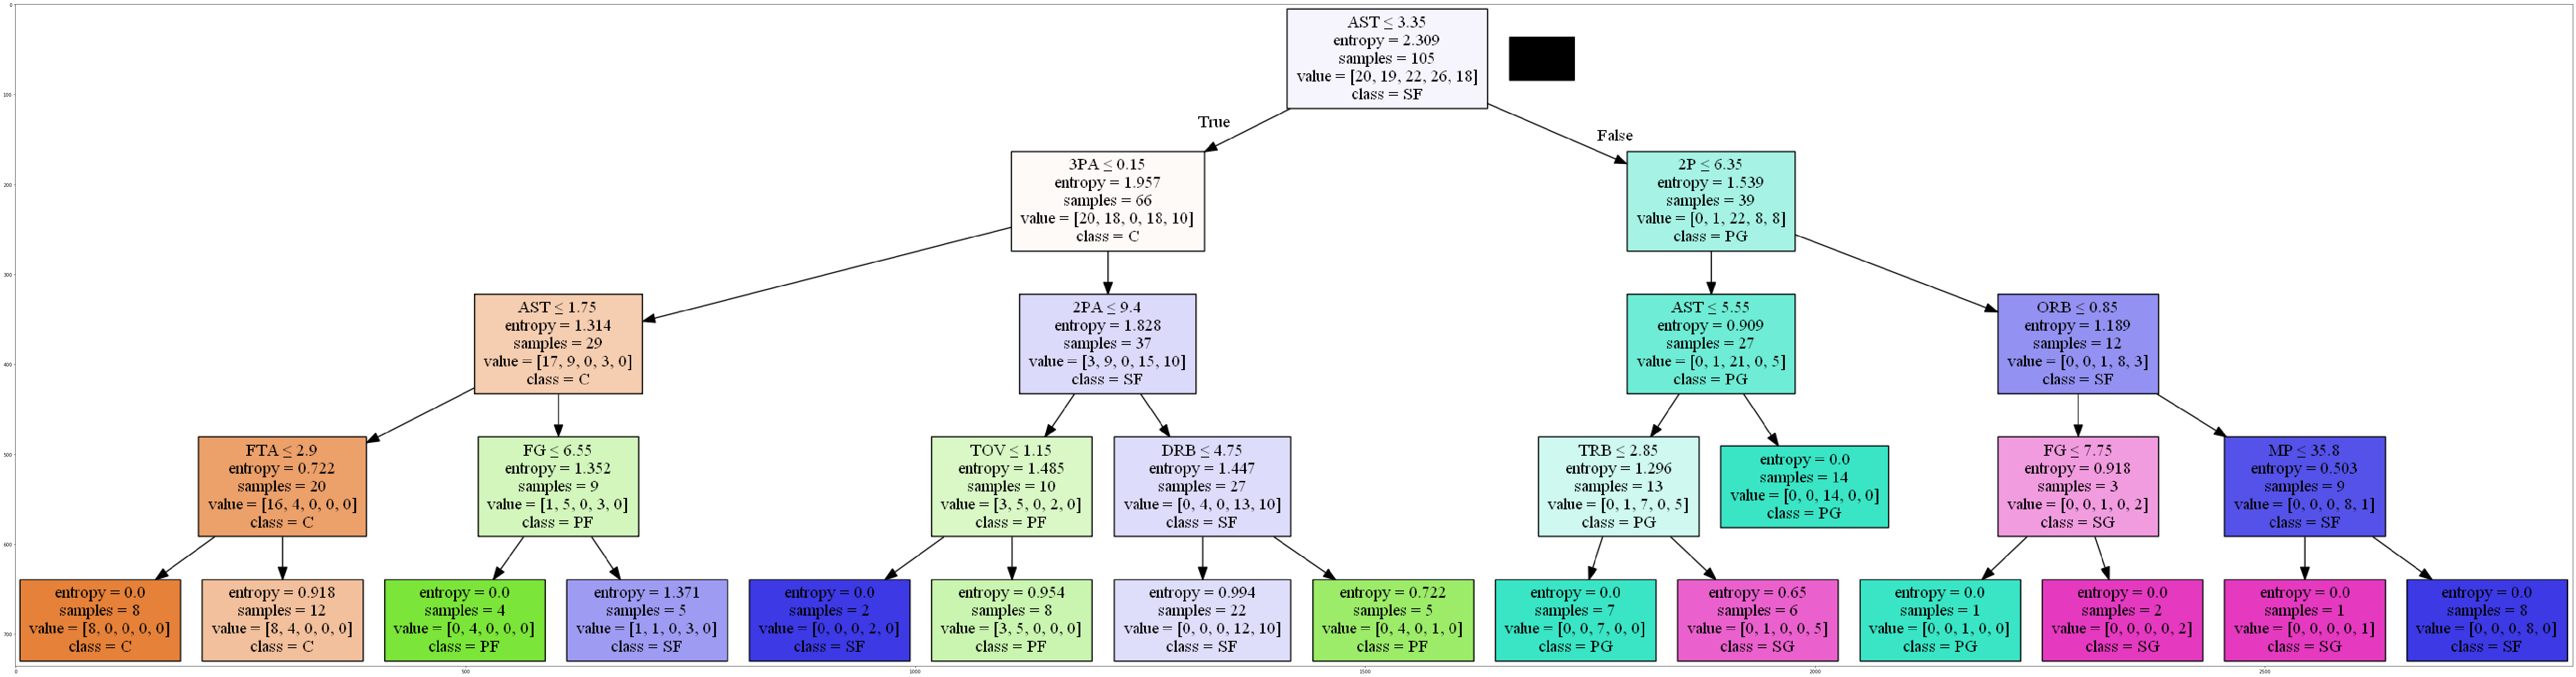

In [16]:
dot_data = StringIO()
filename = "postree.png"
featureNames = my_data.columns[1:24]
out=tree.export_graphviz(posTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')